In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import os

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
)
val_datagen=ImageDataGenerator(rescale=1./255)
batch_size=128

train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/SignLanguage/Splitdataset48x48/train',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'

)
validation_generator=val_datagen.flow_from_directory(
    '/content/drive/MyDrive/SignLanguage/Splitdataset48x48/val',
    target_size=(48,48),
    batch_size=128,
    class_mode='categorical',
    color_mode='grayscale'

)

Found 10137 images belonging to 27 classes.
Found 4349 images belonging to 27 classes.


In [ ]:
class_names=list(train_generator.class_indices.keys())
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'blank']

In [ ]:
model=Sequential()
#convulational layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#connected layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(27,activation='softmax'))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
!rm=rf Logs
logdir=os.path.join("Logs")
TensorBoard_callback=TensorBoard(log_dir=logdir)


/bin/bash: line 1: Logs: command not found


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[TensorBoard_callback]
)

Epoch 1/100
79/79 [==============================] - 3757s 48s/step - loss: 2.7491 - accuracy: 0.1851 - val_loss: 0.9645 - val_accuracy: 0.7086
Epoch 2/100
79/79 [==============================] - 200s 3s/step - loss: 0.5881 - accuracy: 0.8204 - val_loss: 0.0775 - val_accuracy: 0.9815
Epoch 3/100
41/79 [==============>...............] - ETA: 1:25 - loss: 0.1659 - accuracy: 0.9495

In [ ]:
predictions=model.predict(validation_generator)

34/34 [==============================] - 18s 528ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(validation_generator.classes,predictions.argmax(axis=1))


In [ ]:
accuracy


0.04138882501724534

In [ ]:
loss: 0.0554 - accuracy: 0.9840 - val_loss: 0.0087 - val_accuracy: 0.9976

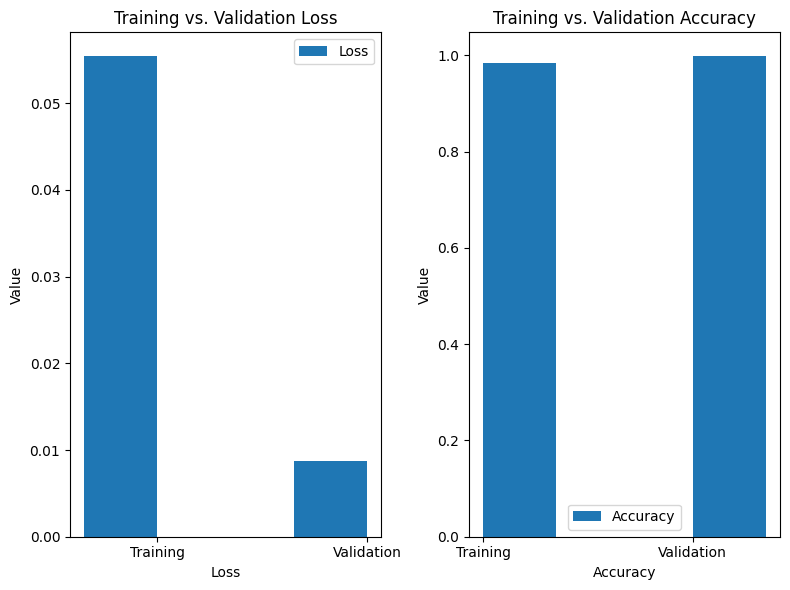

In [ ]:
import matplotlib.pyplot as plt

# Training and validation data
train_loss = 0.0554  # Replace with your actual training loss
train_accuracy = 0.9840  # Replace with your actual training accuracy
val_loss = 0.0087  # Replace with your actual validation loss
val_accuracy = 0.9976  # Replace with your actual validation accuracy

# Labels for the bars
labels = ['Training', 'Validation']

# Create the bar chart
x = range(len(labels))  # Positions for the bars
width = 0.35  # Bar width

plt.figure(figsize=(8, 6))

# Loss bar chart
plt.subplot(1, 2, 1)
# Convert the range object to a list so you can perform arithmetic operations
plt.bar([i - width/2 for i in x], [train_loss, val_loss], width, label='Loss')
plt.xlabel('Loss')
plt.ylabel('Value')
plt.title('Training vs. Validation Loss')
plt.xticks(x, labels)
plt.legend()

# Accuracy bar chart
plt.subplot(1, 2, 2)
# Convert the range object to a list so you can perform arithmetic operations
plt.bar([i + width/2 for i in x], [train_accuracy, val_accuracy], width, label='Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Training vs. Validation Accuracy')
plt.xticks(x, labels)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/signlanguagedetectionmodel48x48.json", 'a') as json_file:
    json_file.write(model_json)  # Append to existing content

model.save("/content/drive/MyDrive/signlanguagedetectionmodel48x48.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: confussion matrix for comparing validation data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(validation_generators, predictions.argmax(axis=1))

# Set up the plot
plt.figure(figsize=(10, 10))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Validation Data")

# Display the plot
plt.show()


NameError: name 'validation_generators' is not defined